In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
sonar_data=pd.read_csv('/content/sonar.all-data',header=None)

In [ ]:
sonar_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [ ]:
sn=sonar_data.groupby(60).mean()


In [ ]:
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

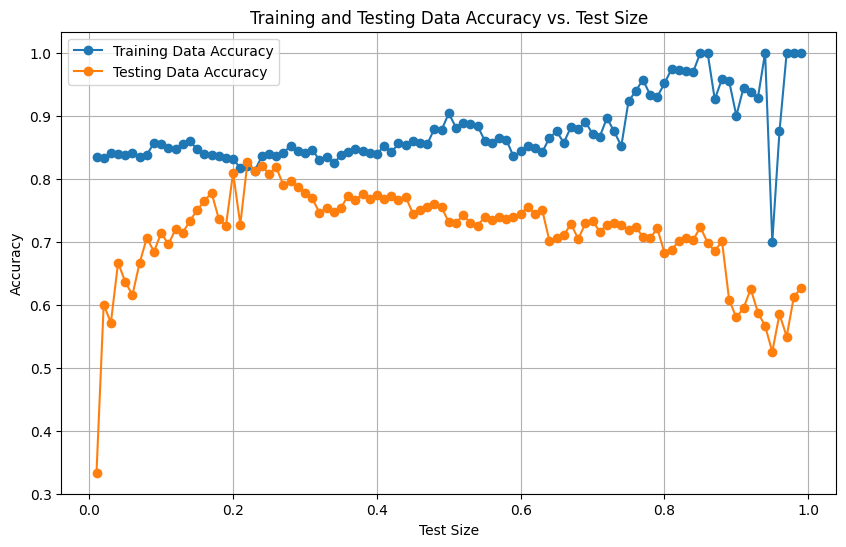

In [ ]:
test_sizes = np.linspace(0.01, 0.99, 99)

training_data_accuracies = []
testing_data_accuracies = []

for test_size in test_sizes:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

    # Fit the model
    model = LogisticRegression()
    model.fit(X_train, Y_train)

    # Make predictions on training data
    X_train_prediction = model.predict(X_train)

    # Calculate training data accuracy
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

    # Save training data accuracy
    training_data_accuracies.append(training_data_accuracy)

    # Make predictions on testing data
    X_test_prediction = model.predict(X_test)

    # Calculate testing data accuracy
    testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    # Save testing data accuracy
    testing_data_accuracies.append(testing_data_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, training_data_accuracies, marker='o', linestyle='-', label='Training Data Accuracy')
plt.plot(test_sizes, testing_data_accuracies, marker='o', linestyle='-', label='Testing Data Accuracy')
plt.title('Training and Testing Data Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X and Y are your features and target variables, replace them with your actual data
# X and Y should be numpy arrays or pandas DataFrames/Series
# Replace this with your actual data
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

test_sizes = np.linspace(0.01, 0.99, 99)

training_data_accuracies = []
testing_data_accuracies = []

for test_size in test_sizes:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

    # Fit the model
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    # Make predictions on training data
    X_train_prediction = model.predict(X_train)

    # Calculate training data accuracy
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

    # Save training data accuracy
    training_data_accuracies.append(training_data_accuracy)

    # Make predictions on testing data
    X_test_prediction = model.predict(X_test)

    # Calculate testing data accuracy
    testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

    # Save testing data accuracy
    testing_data_accuracies.append(testing_data_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, training_data_accuracies, marker='o', linestyle='-', label='Training Data Accuracy')
plt.plot(test_sizes, testing_data_accuracies, marker='o', linestyle='-', label='Testing Data Accuracy')
plt.title('Training and Testing Data Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#making a predictive system

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
model = LogisticRegression()
model.fit(X_train, Y_train)


X_train_prediction = model.predict(X_train)


training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracies.append(training_data_accuracy)
X_test_prediction = model.predict(X_test)


input_data=(0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
            )
input_data_as_np_array=np.asarray(input_data)

input_data_reshaped=input_data_as_np_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]=='R'):
    print('the object is rock ')

else:
  print('the object is mine ')



['R']
the object is rock 
